## Fully connected layers + reduced transform using all 3 tasks - Cross Validation Results Evaluation

In [1]:
import sys
sys.path.append("../")
sys.path.append("../../venv/lib/python3.6/site-packages/")

In [2]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

/home/jesper/tmp/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the data

In [3]:
pred_dir = "models_preds"
# pred_dir = "/home/jesper/tmp/"
# base_name = "UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split"
base_name = "fully_con_reduced_transform_visuals_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split"
folds = []

for filename in os.listdir(pred_dir):
    if filename.startswith(base_name):
        print("loading ", filename)
        folds.append(pd.read_csv(os.path.join(pred_dir, filename)))
        
print ("loaded ", len(folds), " folds")

loading  fully_con_reduced_transform_visuals_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-4.csv
loading  fully_con_reduced_transform_visuals_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-2.csv
loading  fully_con_reduced_transform_visuals_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-3.csv
loading  fully_con_reduced_transform_visuals_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-1.csv
loading  fully_con_reduced_transform_visuals_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-0.csv
loaded  5  folds


In [4]:
folds[0]

,imageHASH,name,violence,protest,sign,photo,fire,police,children,group_20,...,pred_sign,pred_photo,pred_fire,pred_police,pred_children,pred_group_20,pred_group_100,pred_flag,pred_night,pred_shouting
0,8acce2c3c98dcdc6,train-22845.jpg,0.351009,True,True,False,False,False,False,True,...,0.462269,0.001064,0.001488,0.041536,0.002066,0.983271,0.415068,0.015686,0.054470,0.004750
1,87c7ca54d4d21636,train-28103.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.990446,0.907889,0.000154,0.001174,0.019057,0.813503,0.023455,0.009903,0.000707,0.009224
2,c4bed6d6d24bd4d0,train-06095.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.815235,0.011857,0.000659,0.021280,0.023552,0.749565,0.079728,0.012237,0.062224,0.047017
3,f4f6e666c50c5f55,train-15269.jpg,0.254594,True,True,False,False,False,False,True,...,0.897922,0.026484,0.004174,0.011085,0.010629,0.941091,0.507782,0.093235,0.003058,0.016783
4,3ffdf83c39d0e028,train-01764.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.782099,0.001530,0.003240,0.027011,0.000751,0.945037,0.146655,0.004598,0.529483,0.002550
5,aaaab9b2b2aaaab0,train-16497.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.867121,0.011440,0.001705,0.017876,0.002340,0.367838,0.005973,0.005457,0.028310,0.001697
6,7070f0e8c6de70b8,test-03345.jpg,0.765545,True,False,False,True,True,False,False,...,0.008381,0.000706,0.951024,0.402753,0.000739,0.035332,0.001427,0.004502,0.956167,0.001991
7,d992ab5974789b8d,train-07554.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.892739,0.037999,0.000923,0.001298,0.005968,0.471889,0.011834,0.138299,0.002015,0.002795
8,810702e2616b4266,train-01696.jpg,0.288506,True,True,False,False,False,True,False,...,0.969385,0.003231,0.000281,0.028223,0.032895,0.406305,0.008726,0.002662,0.003163,0.003637
9,7171694953d9b3bb,train-20588.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.519702,0.141836,0.000918,0.012128,0.008475,0.063710,0.000780,0.057396,0.004369,0.023135


### Protest

printing fold  0


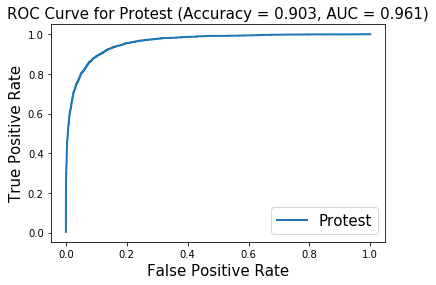

printing fold  1


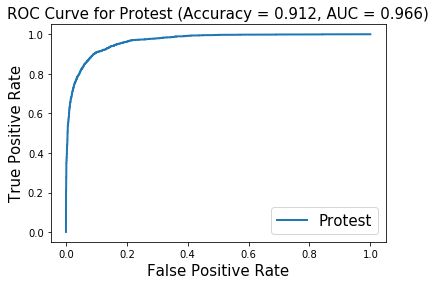

printing fold  2


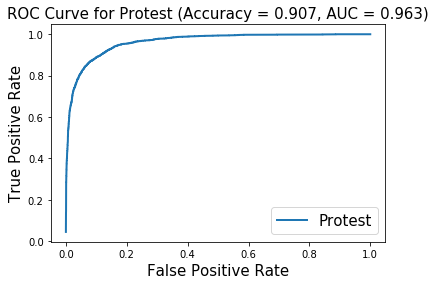

printing fold  3


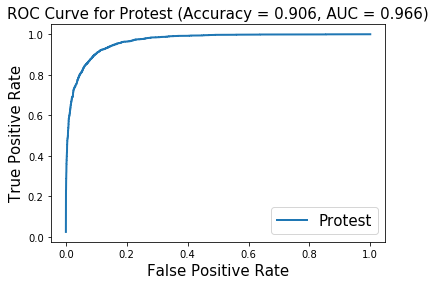

printing fold  4


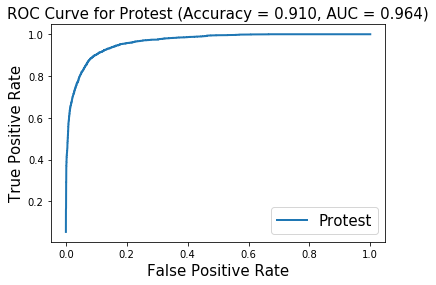

In [5]:
for indx, fold in enumerate(folds):
    print("printing fold " , indx)
    au.plotROC("protest", fold["protest"], fold["pred_protest"])

### Violence

the rsquare measure has a mean of  0.8210443651420926  and standard deviation of  0.0076928943444514375
the correlation measure has a mean of  0.906105026708316  and standard deviation of  0.004248024954551232


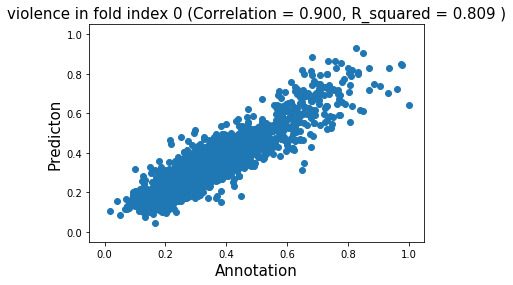

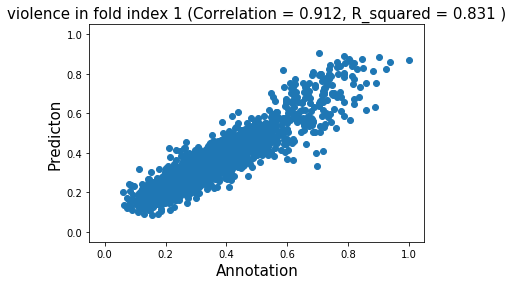

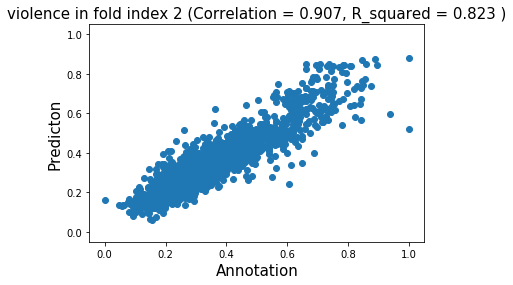

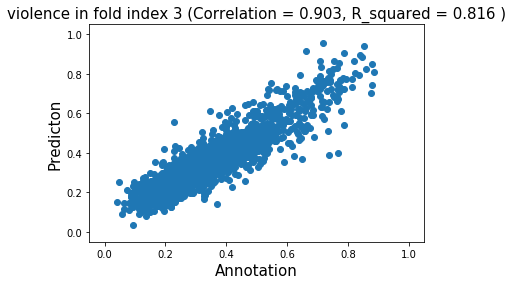

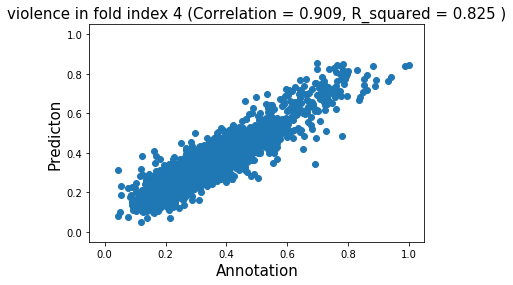

In [6]:
r_squared_all_folds = []
corr_all_folds = []

for indx, fold in enumerate(folds):
    # remove masked values from test set
    non_masked_violence_true = fold[fold["violence"] != - 1]["violence"]
    non_masked_violence_preds = fold[fold["violence"] != - 1]["pred_violence"]
    
    fig, ax = plt.subplots()
    plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
    plt.xlim([-.05,1.05])
    plt.ylim([-.05,1.05])
    plt.xlabel('Annotation', fontsize = 15)
    plt.ylabel('Predicton', fontsize = 15)
    corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
    r_squared = r_value ** 2
    r_squared_all_folds.append(r_squared)
    corr_all_folds.append(corr)
    plt.title(('{attr} in fold index {fold} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
                .format(attr = "violence", corr= corr, r_2 = r_squared, fold = indx  )), fontsize = 15)
    
std_rsquare = np.std(np.array(r_squared_all_folds))
mean_rsquare = np.mean(np.array(r_squared_all_folds))

std_corr = np.std(np.array(corr_all_folds))
mean_corr = np.mean(np.array(corr_all_folds))

print("the rsquare measure has a mean of ", mean_rsquare, " and standard deviation of ", std_rsquare)
print("the correlation measure has a mean of ", mean_corr, " and standard deviation of ", std_corr)